# Student grades prediction

## Import necessary libaraies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.

The dataset contains the grades of students they which they score in all the subject and there Seat No. and target columns CGPA.

## Import the dataset

In [ ]:
# Load csv file and convert into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")

df.head()

The dataset contains all are categorical data and target columns has continous values.

In [ ]:
pd.set_option('display.max_columns',None)

## Exploratory Data Analysis (EDA)

In [ ]:
# Checking the dimensions of the dataset
df.shape

This dataset contains 571 rows and 43 columns. Out of which 1 is target variable and remaning 42 are indepndent variables.

In [ ]:
# Checking the columns of the dataset
df.columns.tolist()

In [ ]:
# Checking the datatypes of each columns
df.dtypes

In [ ]:
# Checking the missing values
df.isnull().sum()

We are checking most of columns has missing values.

In [ ]:
# Let's visualize it using heatmap
sns.heatmap(df.isnull(),cmap='Blues_r')
plt.show()

And we can clearly visualize that there are misisng data present.

In [ ]:
df.iloc[42:46]

In [ ]:
df.iloc[136:145]

In [ ]:
df.iloc[275:300]

We can see most of the rows are missing lot of values of we remove all the rows which has one or one than more value is missing.

In [ ]:
df = df.dropna(axis=0)

df.shape

In [ ]:
# To get good overview of the dataset
df.info()

This gives the brief about the dataset which includes indexing type, columns type, no null values and memory usage.

In [ ]:
# Checking the unique values
df.nunique()

Ther are the unique values present in the dataset.  

In [ ]:
# Checking value counts of eachc columns
for i in df:
    print(df[i].value_counts())
    print('\n')

There are the value counts of all the columns.

### Chekcing the duplicates

In [ ]:
df.duplicated().sum()

There are no duplicates value in the dataset.

### Drop unwanted columns

In [ ]:
# Remove these columns which has no need in model buliding. 
df = df.drop(columns='Seat No.',axis=1)

df.head(2)

In [ ]:
df.shape

## Decscription of Dataset

In [ ]:
#Statistical summary of numerical columns
df.describe()

In the dataset all the columns has categorical columns. we do need to check distirbution. But target columns has continous values but we donot need to check distribution of target column.

## Data Visualizaiton 

### Univariate Analysis

In [ ]:
# Let's check count of each features
plt.figure(figsize=(10,50),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=42:
        ax = plt.subplot(21,2,plotnumber)
        sns.countplot(x=col,data=df)
        plt.xlabel(col)
    plotnumber+=1
plt.show()

In [ ]:
# Checking the relationship between feature and target using stripplot
plt.figure(figsize=(10,50),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=42:
        ax = plt.subplot(21,2,plotnumber)
        sns.stripplot(x=col,y='CGPA',data=df)
        plt.xlabel(col)
        plt.ylabel('CGPA')
    plotnumber+=1
plt.show()

## Sperating features and target

In [ ]:
x = df.drop(columns='CGPA',axis=1)
y = df['CGPA']


print("Features dimesnion :",x.shape)
print("Target dimesnion :",y.shape)

## Encoding categorical columns

In [ ]:
# Encoding categorical columns using simple replace method
for i in df.columns:
    x[i] = x[i].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','E','F','W','WU'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


In [27]:
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,6,10,9,8,9,10,11,9,6,9,9,4,11,3,6,7,10,10,11,2,11,9,8,9,7,5,8,7,4,8,9,8,9,9,9,9,3,2,9,5,3
1,2,11,10,11,6,8,11,2,10,11,4,7,6,9,10,10,11,8,11,6,8,11,10,11,9,3,10,9,9,8,3,11,10,11,8,11,3,6,8,8,5
2,2,5,2,6,4,2,6,4,3,3,6,3,2,2,2,2,1,2,3,2,3,2,2,7,2,4,3,5,2,4,3,3,5,5,2,8,2,2,2,3,2
3,11,7,10,11,11,3,10,9,11,7,11,5,10,6,11,8,4,7,11,10,11,11,10,11,6,11,6,10,9,10,4,9,10,8,10,9,6,5,7,7,7
4,3,3,3,4,2,2,3,4,2,3,8,2,2,3,3,3,6,2,3,2,3,3,7,9,3,6,3,7,3,3,6,3,6,4,4,6,3,2,3,3,2


## Feature Scaling using Standard Scalarization

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

We have scaled the data using Standard Scalaization method to overcome the issue of biasness.

In [29]:
# Find the variance inflation factor in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF value'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif

,Feature,VIF value
0,PH-121,3.281550
1,HS-101,1.901621
2,CY-105,3.019703
3,HS-105/12,2.701831
4,MT-111,2.995539
5,CS-105,2.456745
6,CS-106,2.706562
7,EL-102,2.122113
8,EE-119,2.338330
9,ME-107,2.506522


So, we has not multicolinearity issue, We can now move ahead for model building.

# Model Building

In [36]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding the best random state

In [32]:
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.25)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9978731759154098 on Random_state 240


## Creating train test split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)

In [42]:
LR  = LinearRegression()
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVC':SVM,'XGBoost':XGB}

## Applying all Regression Model

In [45]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', name, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    print('\n')
    print('=================================================================================')



 Error of  LinearRegression :
Mean absolute error : 0.020344837397546788
Mean squared error : 0.0006669401554514957
Root Mean Squared Error: 0.025825184519214877


 R2 Score :
0.9978731759154098




 Error of  KNeighbors :
Mean absolute error : 0.08616952380952385
Mean squared error : 0.012259626285714286
Root Mean Squared Error: 0.11072319669208565


 R2 Score :
0.960904935413762




 Error of  DecisionTree :
Mean absolute error : 0.18244761904761905
Mean squared error : 0.059629609523809524
Root Mean Squared Error: 0.2441917474523034


 R2 Score :
0.8098454731607947




 Error of  ExtraTree :
Mean absolute error : 0.186
Mean squared error : 0.059641371428571434
Root Mean Squared Error: 0.2442158296027746


 R2 Score :
0.8098079652942736




 Error of  RandomForest :
Mean absolute error : 0.0865131428571427
Mean squared error : 0.01366958400571424
Root Mean Squared Error: 0.11691699622259477


 R2 Score :
0.9564086818704142




 Error of  Bagging :
Mean absolute error : 0.1009971428

# Cross Validation

In [95]:
for name,model in models.items():
    score = cross_val_score(model, x, y, cv =5)
    print('\033[1m', name,'\033[0m\n')
    print('R2 score                       :' ,r2_score(y_test,y_pred))
    print('Cross Validation Score         :', score)
    print("Mean of Cross Validation Score :" ,score.mean())
        
    final = (r2_score(y_test,y_pred)) - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score :',final)
    
    print('============================================================================\n')

 LinearRegression 

R2 score                       : 0.9368471467619319
Cross Validation Score         : [0.99632241 0.997225   0.99619029 0.99318538 0.99430216]
Mean of Cross Validation Score : 0.9954450501224261

Different between Accuracy vs Cross Val Score : -0.0585979033604942

 KNeighbors 

R2 score                       : 0.9368471467619319
Cross Validation Score         : [0.97165193 0.9701062  0.96277043 0.96492463 0.94935362]
Mean of Cross Validation Score : 0.9637613612115118

Different between Accuracy vs Cross Val Score : -0.026914214449579865

 DecisionTree 

R2 score                       : 0.9368471467619319
Cross Validation Score         : [0.7787719  0.88852995 0.76167093 0.80730612 0.72767082]
Mean of Cross Validation Score : 0.7927899441453157

Different between Accuracy vs Cross Val Score : 0.14405720261661625

 ExtraTree 

R2 score                       : 0.9368471467619319
Cross Validation Score         : [0.73290248 0.82567317 0.74052737 0.79196019 0.72187018]
M

**We can see that XGBoost gives less error between accuracy score and CrossValidation.**

R2 Score : 0.9368471467619319 %
 
Cross Val Score : 0.9297829518694505

Different between R2 score vs Cross Val Score:
 0.007064194892481446

### XGBoost  is out best Model

# Hyper Parameter Tuning : GridSearchCV

In [105]:
XGB.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'learning_rate': [0.01,0.02,0.03,0.04],
                'subsample'    : [0.7,0.5, 0.3, 0.1],
                'n_estimators' : [100,250,500,750],
                'max_depth'    : [4,6,8,10],
                'random_state': [10,50,1000]
             }

GCV = GridSearchCV(estimator = XGB, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Best score :  0.986181554703286


In [107]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.04584454428354899
Mean squared error : 0.003256128815825113
Root Mean Squared Error: 0.05706249920766802


 R2 Score of Final Model :
0.9896164398988141




 Actual Values Vs Predicted Value plot :


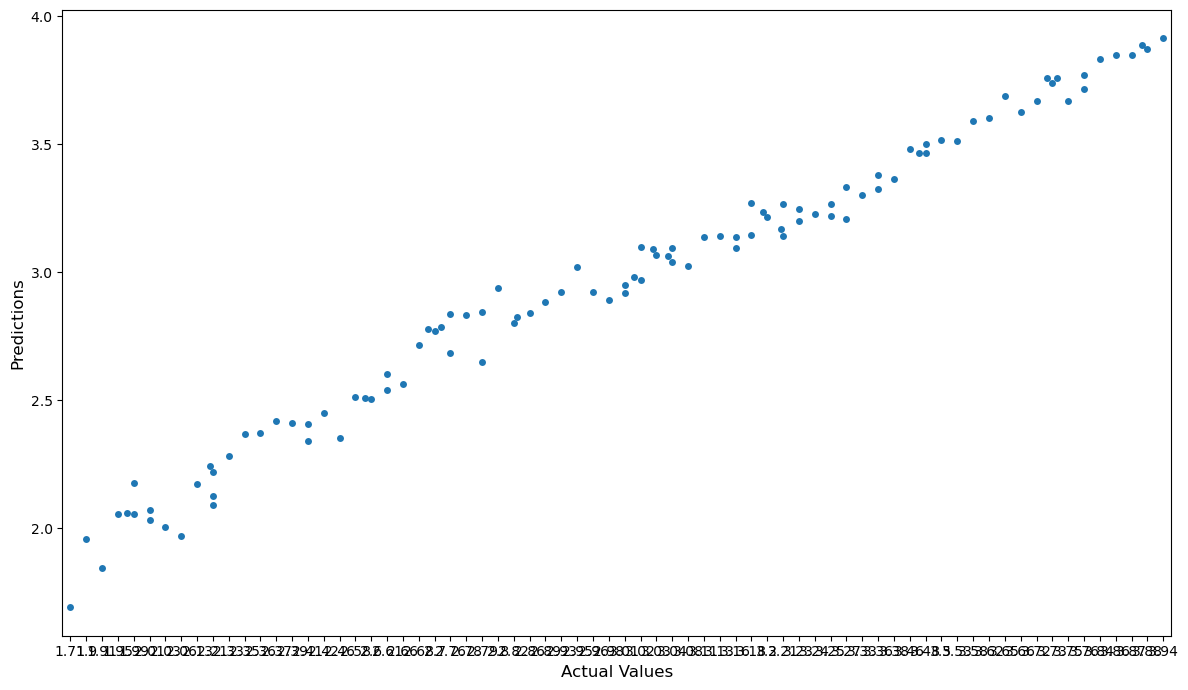

In [110]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

## Saving Model

In [113]:
import pickle
filename = 'Student_grades_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

In [114]:
import pickle
loaded_model = pickle.load(open('Student_grades_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

98.96164398988141


In [115]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
Predicted,3.760338,3.218387,3.48198,3.226715,2.922412,3.76045,2.715445,3.099003,3.137518,3.06686,1.971556,3.667642,2.80181,3.093811,2.842827,2.650504,2.069862,3.848614,3.381716,2.058851,2.56532,2.282098,3.628333,3.141793,2.686549,3.14397,3.913837,3.246303,2.409621,2.825359,2.173057,1.691221,2.785837,2.004483,2.244655,3.714945,2.981054,3.094967,2.919784,2.21947,3.365585,3.33455,2.366662,3.024525,3.265701,2.176324,1.959772,3.668807,2.127821,3.515048,3.501848,2.510766,2.511862,2.3543,2.448992,2.950064,2.53854,3.465634,1.842792,2.420722,2.832128,3.302801,2.89265,3.235962,3.199419,3.690442,3.517931,3.266425,2.771675,3.168255,3.601737,2.602237,2.408189,2.057383,3.207165,3.323637,3.772483,3.46643,3.091672,2.776906,2.372559,2.836864,3.021344,3.8875,3.215009,2.938165,3.039498,3.270986,2.09038,2.339894,2.846682,2.92392,2.885898,3.849732,2.056265,3.142219,2.506377,3.740588,2.033294,3.591297,3.87117,2.971441,3.833726,3.136663,3.062448
Original,3.734000,3.247000,3.45800,3.240000,2.956000,3.72700,2.683000,3.015000,3.111000,3.02600,2.056000,3.754000,2.82100,3.043000,2.857000,2.792000,2.008000,3.863000,3.365000,1.992000,2.65900,2.328000,3.664000,3.133000,2.756000,3.17900,3.942000,3.229000,2.394000,2.815000,2.129000,1.714000,2.696000,2.028000,2.208000,3.759000,3.019000,3.164000,3.010000,2.20600,3.378000,3.26600,2.347000,3.075000,3.248000,1.989000,1.899000,3.725000,2.206000,3.528000,3.481000,2.605000,2.580000,2.4620,2.424000,3.010000,2.60700,3.481000,1.909000,2.370000,2.776000,3.334000,2.98200,3.195000,3.226000,3.647000,3.504000,3.208000,2.698000,3.207000,3.624000,2.612000,2.407000,1.992000,3.272000,3.365000,3.765000,3.48300,3.033000,2.699000,2.359000,2.760000,2.953000,3.8780,3.195000,2.805000,3.043000,3.182000,2.20600,2.408000,2.793000,2.93100,2.891000,3.873000,1.953000,3.211000,2.595000,3.730000,2.009000,3.578000,3.87600,3.023000,3.844000,3.160000,3.044000
